# Logistic Regression on Fruits-360 Dataset

---



Ganesh Kumar T K , kichulee1998@gmail.com ,  Chennai, India 


Machine Learning Engineer Intern , AI Tech Systems , www.ai-techsystems.com 

---




## Content:
  * Initialize parameters weight and bias
  * Forward propagation
  * Loss function
  * Cost function
  * Backward propagation (gradient descent)
  * Prediction with learnt parameters weight and bias
  * Logistic regression with sklearn

### Transfering Kaggle Fruit-360 Dataset into Google Colab


---





In [0]:
!pip install kaggle

In [0]:
!mkdir .kaggle

In [0]:
import json
token = {"username":"YOUR USERNAME","key":"YOUR KEY"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!kaggle datasets download -d moltean/fruits -p /content

 99% 699M/709M [00:12<00:00, 58.3MB/s]
100% 709M/709M [00:12<00:00, 59.3MB/s]


In [0]:
!unzip \*.zip

Archive:  fruits.zip
   creating: fruits-360/
  inflating: fruits-360/LICENSE      
   creating: fruits-360/papers/
  inflating: fruits-360/readme.md    
   creating: fruits-360/test-multiple_fruits/
  inflating: fruits-360/test-multiple_fruits/apple_apricot_nectarine_peach_peach(flat)_pomegranate_pear_plum.jpg  
  inflating: fruits-360/test-multiple_fruits/apple_apricot_peach_peach(flat)_pomegranate_pear_plum.jpg  
  inflating: fruits-360/test-multiple_fruits/apple_apricot_peach_peach(flat)_pomegranate_pear_plum_2.jpg  
  inflating: fruits-360/test-multiple_fruits/apple_apricot_peach_peach(flat)_pomegranate_pear_plum_3.jpg  
   creating: fruits-360/Training/
   creating: fruits-360/Training/Apple Braeburn/
  inflating: fruits-360/Training/Apple Braeburn/0_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/100_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/101_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/102_100.jpg  
  inflating: fruits-360/Training/Appl

## Intializing the Dataset to play around.

---



In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image

import seaborn as sns

# plotly
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff

# command for work offline
plotly.offline.init_notebook_mode(connected=True)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../content"))

# Any results you write to the current directory are saved as output.

['.config', '.kaggle', 'fruits.zip', 'readme.md', 'fruits-360', 'sample_data']


No. of Training Samples: 57276
No. of Test Samples: 19548


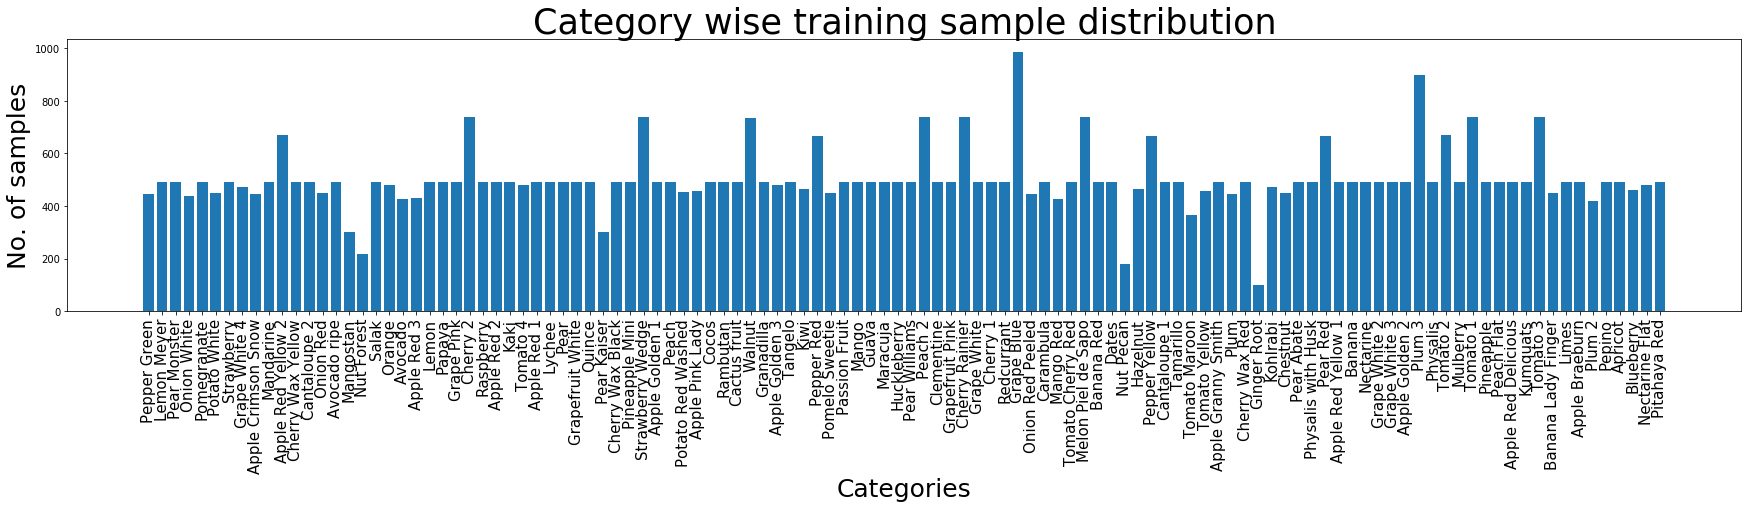

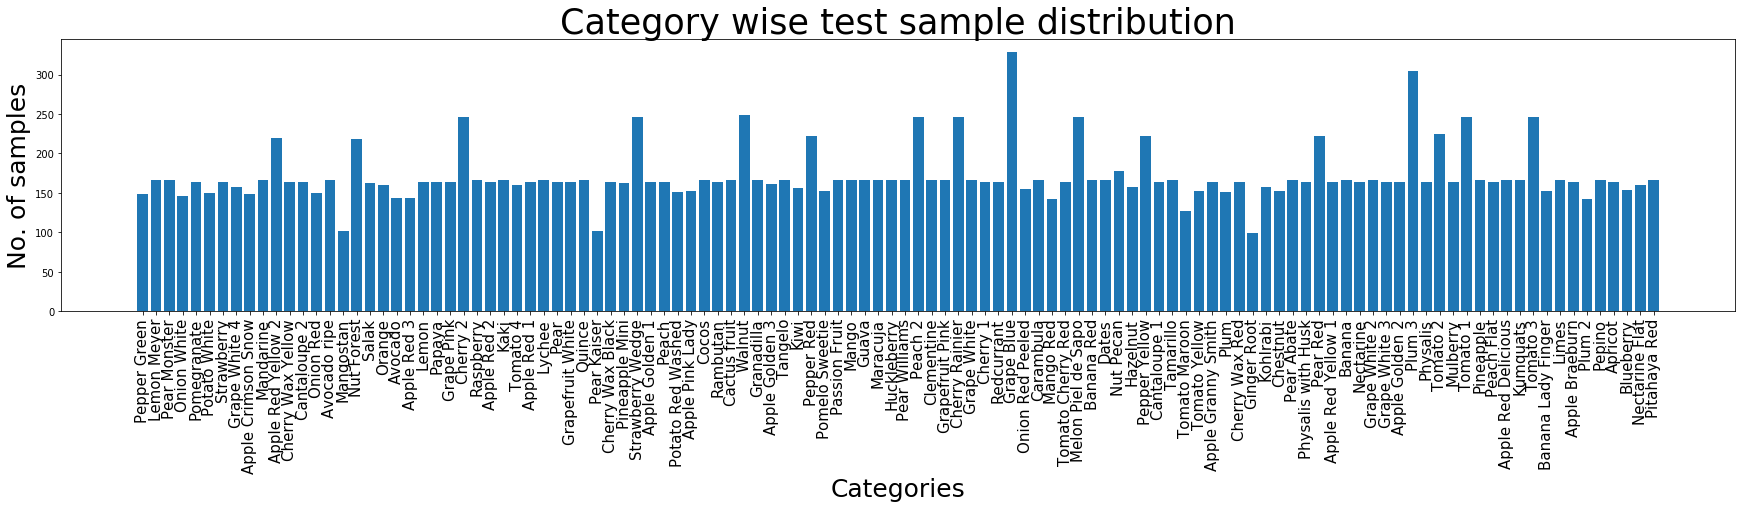

In [0]:
import os, os.path
train_categories = []
train_samples = []
for i in os.listdir("../content/fruits-360/Training"):
    train_categories.append(i)
    train_samples.append(len(os.listdir("../content/fruits-360/Training/"+ i)))

test_categories = []
test_samples = []
for i in os.listdir("../content/fruits-360/Test"):
    test_categories.append(i)
    test_samples.append(len(os.listdir("../content/fruits-360/Test/"+ i)))

    
print("No. of Training Samples:", sum(train_samples))
print("No. of Test Samples:", sum(test_samples))


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

index = np.arange(len(train_categories))
plt.bar(index, train_samples)
plt.xlabel('Categories', fontsize=25)
plt.ylabel('No. of samples', fontsize=25)
plt.xticks(index, train_categories, fontsize=15, rotation=90)
plt.title('Category wise training sample distribution', fontsize=35)
plt.show()


index2 = np.arange(len(test_categories))
plt.bar(index2, test_samples)
plt.xlabel('Categories', fontsize=25)
plt.ylabel('No. of samples', fontsize=25)
plt.xticks(index2, test_categories, fontsize=15, rotation=90)
plt.title('Category wise test sample distribution', fontsize=35)
plt.show()

In [0]:
train_b = "../content/fruits-360/Training/Banana"
train_m= "../content/fruits-360/Training/Mango"
test_b= "../content/fruits-360/Test/Banana"
test_m= "../content/fruits-360/Test/Mango"
image_size = 128

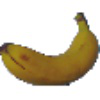

In [0]:
Image.open("../content/fruits-360/Training/Banana/200_100.jpg")

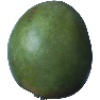

In [0]:
Image.open("../content/fruits-360/Training/Mango/200_100.jpg")

100%|██████████| 490/490 [00:00<00:00, 3637.29it/s]


Text(0.5, 1.0, 'Banana and Mango in GrayScale')

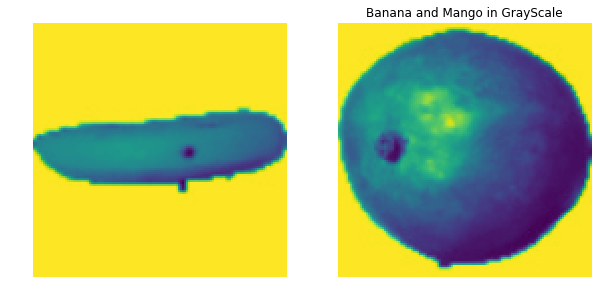

In [0]:
for image in tqdm(os.listdir(train_b)): 
    path = os.path.join(train_b, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(train_m)): 
    path = os.path.join(train_m, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("Banana and Mango in GrayScale")

In [0]:
def train_data():
    train_data_b = [] 
    train_data_m=[]
    for image1 in tqdm(os.listdir(train_b)): 
        path = os.path.join(train_b, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_b.append(img1) 
    for image2 in tqdm(os.listdir(train_m)): 
        path = os.path.join(train_m, image)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_m.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_b),np.asarray(train_data_m)),axis=0)
    return train_data 


In [0]:
def test_data():
    test_data_b = [] 
    test_data_m=[]
    for image1 in tqdm(os.listdir(test_b)): 
        path = os.path.join(test_b, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_b.append(img1) 
    for image2 in tqdm(os.listdir(test_m)): 
        path = os.path.join(test_m, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_m.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_b),np.asarray(test_data_m)),axis=0) 
    return test_data

In [0]:
train_data = train_data() 
test_data = test_data()

100%|██████████| 166/166 [00:00<00:00, 3989.72it/s]


In [0]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [0]:
z1 = np.zeros(490)
o1 = np.ones(490)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(166)
o = np.ones(166)
Y_test = np.concatenate((o, z), axis=0)

In [0]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [0]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (1312, 128, 128)
Y shape:  (1312, 1)


# Logistic Regression
* When we talk about binary classification( 0 and 1 outputs) what comes to mind first is logistic regression.

* Now lets look at computation graph of logistic regression<br><br>
<a href="http://ibb.co/c574qx"><img src="http://preview.ibb.co/cxP63H/5.jpg"></a>
<br><br>
* Parameters are weight and bias.  
* Weights: coefficients of each pixels
* Bias: intercept
* z = (w.t)x + b  => z equals to (transpose of weights times input x) + bias 
* In an other saying => z = b + px1*w1 + px2*w2 + ... + px4096*w4096
* y_head = sigmoid(z)
* Sigmoid function makes z between zero and one so that is probability. 
    Parameters to be found are weights and bias
* Initial values of weight and bias parameters can be chosen arbitrarily
* For every iteration, we are going to calculate loss function
* Sum of the loss function will be our cost function
* We are going to update weight and bias parameters using derivative of cost function and a learning rate
* Learning rate and number of iteration(we will learn when we test our data) are hyperparameter that are chosen randomly and tuned.
* After many iteratios, the cost will be minimized and we will obtain final weight and bias parameters to be used (our machine will learn them).
* Using these final weight and bias parameters we are going to predict a given test data

#### Mathematical expression of log loss(error) function is that: <br><br>
<a href="https://imgbb.com/"><img src="https://image.ibb.co/eC0JCK/duzeltme.jpg" ></a>
* It says that if you make wrong prediction, loss(error) becomes big. 

<a id="7"></a> <br>
####  Optimization Algorithm with Gradient Descent
* Well, now we know what is our cost that is error.
* Therefore, we need to decrease cost because as we know if cost is high it means that we make wrong prediction.
* Lets think first step, every thing starts with initializing weights and bias. Therefore cost is dependent with them.
* In order to decrease cost, we need to update weights and bias.
* In other words, our model needs to learn the parameters weights and bias that minimize cost function. This technique is called gradient descent.
* Lets make an example:
     * We have w = 5 and bias = 0 (so ignore bias for now). Then we make forward propagation and our cost function is 1.5.
<a href="http://imgbb.com/"><img src="http://image.ibb.co/dAaYJH/7.jpg"></a>
* As you can see from graph, we are not at minimum point of cost function. Therefore we need to go through minimum cost.

#### Updating Weight and Bias

* alpha = learning rate
* J: cost function
* w: weight
* b: bias

* Update equation is this. It says that there is a cost function(takes weight and bias). Take derivative of cost function according to weight and bias. Then multiply it with  α learning rate. Then update weight. (In order to explain I ignore bias but these all steps will be applied for bias)

<a href="http://imgbb.com/"><img src="http://image.ibb.co/hYTTJH/8.jpg"></a>

* Learning rate is also called hyperparameter that need to be chosen and tuned.

#### Derivatives of cost function weight and bias

$$ \frac{\partial J}{\partial w} = \frac{1}{m}x(  y_h - y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (y_h-y)$$

Train-Test Split Data

---



In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [0]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (1115, 16384)
X test flatten (197, 16384)


In [0]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 1115)
x test:  (16384, 197)
y train:  (1, 1115)
y test:  (1, 197)


Initializing Parameters(weights and bias) Method


---



In [0]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

Cost after iteration 700: 0.000033
Cost after iteration 800: 0.000032
Cost after iteration 900: 0.000031
Cost after iteration 1000: 0.000031
Cost after iteration 1100: 0.000030
Cost after iteration 1200: 0.000030
Cost after iteration 1300: 0.000030
Cost after iteration 1400: 0.000029


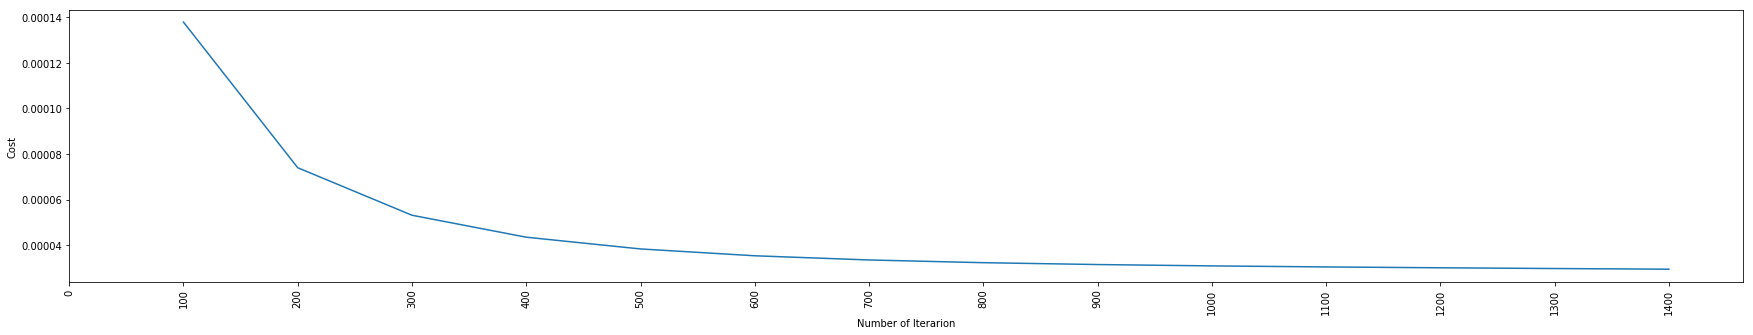

Test Accuracy: 100.0 %
Train Accuracy: 100.0 %


In [0]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 1500)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
y_train = y_train.ravel()
grid={"C":np.logspace(-3,3,7),"penalty":["l2"]},
logistic_regression=LogisticRegression(solver='lbfgs',random_state=42)
log_reg_cv=GridSearchCV(logistic_regression,grid,cv=10)
log_reg_cv.fit(x_train.T,y_train.T)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=({'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l2']},),
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
print("best hyperparameters: ", log_reg_cv.best_params_)
print("accuracy: ", log_reg_cv.best_score_)

best hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
accuracy:  1.0


In [0]:
log_reg= LogisticRegression(C=1,penalty="l1",solver='liblinear')
y_train = y_train.ravel()
log_reg.fit(x_train.T,y_train)
print("test accuracy: {} ".format(log_reg.fit(x_test.T, y_test.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(log_reg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 1.0 
train accuracy: 1.0 


### Confusion Matrix

In [0]:
y_pred = log_reg_model.predict(x_test.T)
y_pred

array([1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1.])

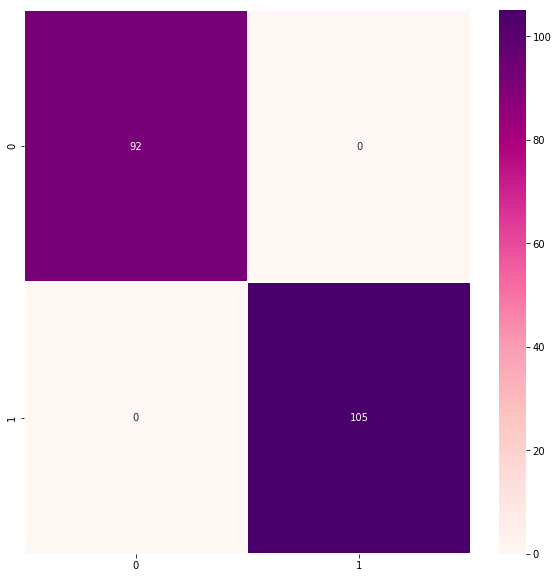

In [0]:
y_pred = log_reg_model.predict(x_test.T)
y_true = y_test.T

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt=".0f",  cmap='RdPu', ax = ax)
plt.xlabel = ("y_pred")
plt.ylabe = ("y_true")
plt.show()